# Models
Read in the file train_cleaned.csv produced by BaseModel.ipynb then run the following code.

In [ ]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [ ]:
tabular = pd.read_csv('train_cleaned_actigraphy.csv')
tabular

,id,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,...,battery_voltage_mean,battery_voltage_std,time_of_day_mean,time_of_day_std,weekday_mean,weekday_std,quarter_mean,quarter_std,relative_date_PCIAT_mean,relative_date_PCIAT_std
0,00008ff9,5,0,51.0,16.877316,46.0,50.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000fd460,9,0,NaN,14.035590,48.0,46.0,22.0,75.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00105258,10,1,71.0,16.648696,56.5,75.6,NaN,65.0,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00115b9f,9,0,71.0,18.292347,56.0,81.6,NaN,60.0,97.0,...,4053.579,112.404045,5.046215e+13,1.942842e+13,4.470182,1.931421,3.0,0.0,53.201683,14.244915
4,0016bb22,18,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,13,0,60.0,16.362460,59.5,82.4,NaN,71.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3956,ffa9794a,10,0,NaN,18.764678,53.5,76.4,27.0,60.0,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3957,ffcd4dbd,11,0,68.0,21.441500,60.0,109.8,NaN,79.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3958,ffed1dd5,13,0,70.0,12.235895,70.7,87.0,NaN,59.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Base Model
The basic model is a logistic regression model that only uses the tabular data to predict the target, sii.

*   The rows that were missing the target value were dropped.
*   There were 10 season columns in the dataset indicating the seasons in which different tests were performed. They were dropped.
*   Missing values were replaced with the median.
* The data was scaled with the standard scaler.

In [ ]:
tabular_unedited = pd.read_csv('train.csv')
tabular_unedited

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


In [ ]:
# tabular columns aka not actigraphy columns
tabular_columns = ['id', 'Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-CGAS_Score',
       'Physical-BMI', 'Physical-Height', 'Physical-Weight',
       'Physical-Waist_Circumference', 'Physical-Diastolic_BP',
       'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
        'FGC-FGC_CU','FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD',
       'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL',
       'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL',
       'FGC-FGC_TL_Zone', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
       'BIA-BIA_TBW', 'PAQ_A-PAQ_A_Total', 'PAQ_C-PAQ_C_Total','SDS-SDS_Total_Raw',
      'SDS-SDS_Total_T','PreInt_EduHx-computerinternet_hoursday', 'sii', 'PCIAT-PCIAT_Total']

In [ ]:
# set X and y and remove cols with missing sii from train set
X = tabular_unedited[tabular_columns].dropna(subset=['sii']).drop(columns=['id', 'sii', 'PCIAT-PCIAT_Total'])
y = tabular_unedited[tabular_columns].dropna(subset=['sii'])['sii']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fill nan values with train median
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())

# scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert scaled numpy arrays back to pandas DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


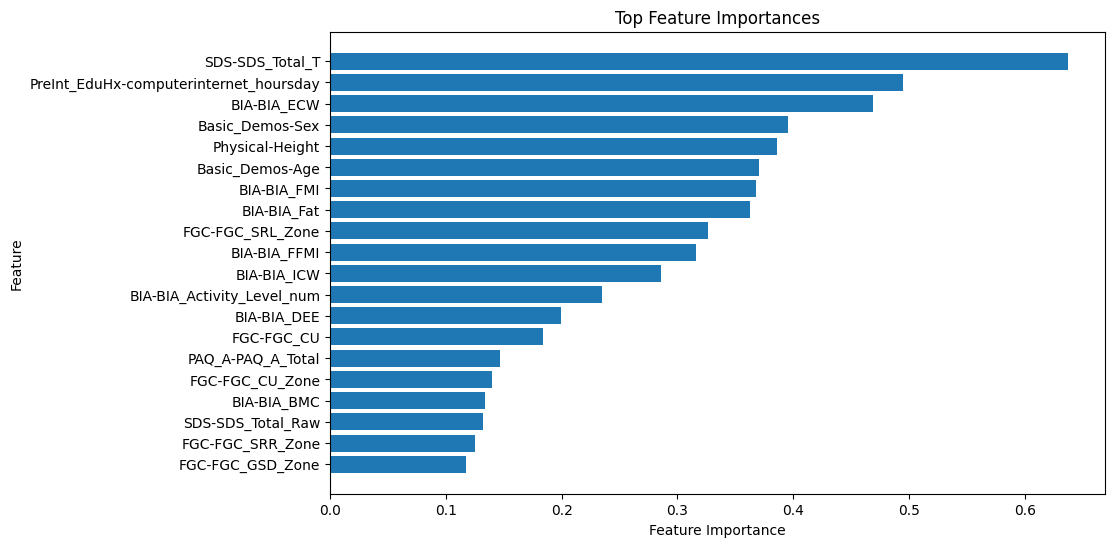

In [ ]:
# multinomal logistic regression
log_model = LogisticRegression()

# train model
log_model.fit(X_train, y_train)

# predict test set
y_pred = log_model.predict(X_test)

# plot top 10 feature importances
feature_importances = np.abs(log_model.coef_[0])

# Create a DataFrame for easier sorting
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top features
top_features = feature_importance_df.head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top Feature Importances")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# evaluations
kappa = cohen_kappa_score(y_pred, y_test, weights='quadratic')
print(f"Cohen's Kappa Score: {kappa}")

mae = mean_absolute_error(y_pred, y_test)
print(f"Mean Absolute Error: {mae}")

# not that helpful as the ouput is ordinal
accuracy = accuracy_score(y_pred, y_test)
print(f"Accuracy Score: {accuracy}")

Cohen's Kappa Score: 0.2656254961861151
Mean Absolute Error: 0.5328467153284672
Accuracy Score: 0.5821167883211679


## PCIAT_Total Model
Model 2 is a linear regression model that predicts PCIAT-PCIAT_Total. The result is then converted to the target, sii.

*   The rows that were missing the target value were dropped.
*   There were 10 season columns in the dataset indicating the seasons in which different tests were performed. They were dropped.
*   Missing values were replaced with the imputer.
* The data was scaled with the standard scaler.


In [ ]:
# remove seasons
object_cols = tabular.dtypes[tabular.dtypes == object].index
tabular = tabular.drop(columns=object_cols)

In [ ]:
# remove PCIAT questions
pciat_columns = [col for col in tabular.columns if col.startswith('PCIAT')]
pciat_columns.remove('PCIAT-PCIAT_Total')
tabular = tabular.drop(columns=pciat_columns)

### Filling Missing

In [ ]:
tabular.isna().sum()

,0
Basic_Demos-Age,0
Basic_Demos-Sex,0
CGAS-CGAS_Score,1540
Physical-BMI,925
Physical-Height,933
...,...
weekday_std,3612
quarter_mean,3612
quarter_std,3612
relative_date_PCIAT_mean,3612


In [ ]:
# select 20% of the rows where PCIAT-PCIAT_Total is not NA for the test set
# all the test and trains that end with a rf are for the Random Forest Model as that csv
# file will be edited due to the correlation matrix that will happen soon.
tabular_test = tabular[tabular['PCIAT-PCIAT_Total'].notna()].sample(frac=0.2)
tabular_test_rf = tabular_test
# train set
tabular_train = tabular.drop(tabular_test.index)
tabular_train_rf = tabular_train
tabular_train

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,battery_voltage_mean,battery_voltage_std,time_of_day_mean,time_of_day_std,weekday_mean,weekday_std,quarter_mean,quarter_std,relative_date_PCIAT_mean,relative_date_PCIAT_std
0,5,0,51.0,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,0,NaN,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,1,71.0,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,0,71.0,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,...,4053.579,112.404045,5.046215e+13,1.942842e+13,4.470182,1.931421,3.0,0.0,53.201683,14.244915
4,18,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3954,7,1,NaN,13.927006,48.5,46.6,23.0,65.0,75.0,105.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3956,10,0,NaN,18.764678,53.5,76.4,27.0,60.0,78.0,118.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3957,11,0,68.0,21.441500,60.0,109.8,NaN,79.0,99.0,116.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3958,13,0,70.0,12.235895,70.7,87.0,NaN,59.0,61.0,113.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


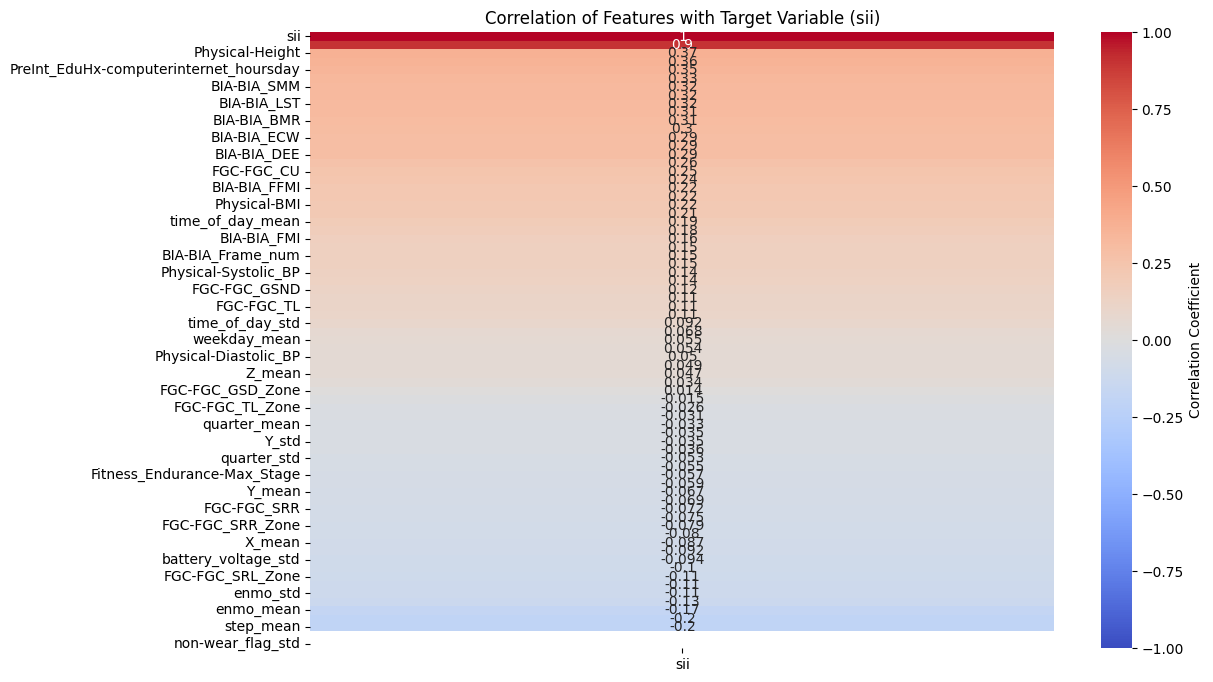

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Performing the correlation analysis for the Random Forest Model preprocessing for better features.
# Compute the correlation matrix for numerical features
correlation_matrix = tabular_train_rf.corr()

# heatmap of the correlations with `sii` (target variable)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['sii']].sort_values(by='sii', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation of Features with Target Variable (sii)")
plt.show()

# Feature Engineering: Selecting features with a significant correlation to `sii`
# only taking features that have above .1 correlation
selected_features = correlation_matrix['sii'][correlation_matrix['sii'].abs() > 0.1].index.tolist()

# Dropping `sii` itself from the list of features to use as predictors
selected_features.remove('sii')

tabular_train_rf = tabular_train_rf[selected_features + ['sii']]
tabular_test_rf = tabular_test_rf[selected_features + ['sii']]

In [ ]:
tabular_train.isna().sum()

,0
Basic_Demos-Age,0
Basic_Demos-Sex,0
CGAS-CGAS_Score,1469
Physical-BMI,889
Physical-Height,897
...,...
weekday_std,3148
quarter_mean,3148
quarter_std,3148
relative_date_PCIAT_mean,3148


In [ ]:
# set X and y
X_train = tabular_train.drop(columns=['PCIAT-PCIAT_Total', 'sii'])
y_train = tabular_train['PCIAT-PCIAT_Total']

X_train_rf = tabular_train_rf.drop(columns=['PCIAT-PCIAT_Total', 'sii'])
y_train_rf = tabular_train_rf['PCIAT-PCIAT_Total']

X_test = tabular_test.drop(columns=['PCIAT-PCIAT_Total', 'sii'])
y_test = tabular_test['PCIAT-PCIAT_Total']

X_test_rf = tabular_test_rf.drop(columns=['PCIAT-PCIAT_Total', 'sii'])
y_test_rf = tabular_test_rf['PCIAT-PCIAT_Total']

# Apply Iterative Imputer to train and test
imputer = IterativeImputer(max_iter=10, random_state=0)

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

X_train_rf = pd.DataFrame(imputer.fit_transform(X_train_rf), columns=X_train_rf.columns)
X_test_rd = pd.DataFrame(imputer.transform(X_test_rf), columns=X_test_rf.columns)

In [ ]:
# prompt: pandas df given 2 lists

import pandas as pd

# Sample data for demonstration
data1 = [1, 2, 3, 4, 5]
data2 = ['A', 'B', 'C', 'D', 'E']

# Create a Pandas DataFrame
df = pd.DataFrame({'Column1': data1, 'Column2': data2})

# Print the DataFrame
df

In [ ]:
# scale data
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

X_train_rf = pd.DataFrame(scaler.fit_transform(X_train_rf), columns=X_train_rf.columns)
X_test_rf = pd.DataFrame(scaler.transform(X_test_rf), columns=X_train_rf.columns)

X_test

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,battery_voltage_mean,battery_voltage_std,time_of_day_mean,time_of_day_std,weekday_mean,weekday_std,quarter_mean,quarter_std,relative_date_PCIAT_mean,relative_date_PCIAT_std
0,-0.401895,1.294937,0.566602,-0.975891,0.013600,-0.624236,-0.694712,0.817088,0.116809,-0.130711,...,-0.041409,-0.041415,7.686151e-15,0.000000e+00,-0.041459,0.041086,0.045351,-0.041416,-0.005616,-0.041370
1,-0.955321,1.294937,0.789907,-0.790818,-1.525526,-1.156656,-1.150313,-0.057266,0.634494,0.290124,...,-0.433838,-0.433858,7.686151e-15,0.000000e+00,-0.433701,0.433939,0.455167,-0.434155,-0.060314,-0.433979
2,-0.955321,1.294937,0.008341,-0.073684,-0.448138,-0.396055,-0.237711,1.166829,0.116809,1.272070,...,-0.026829,-0.026853,7.686151e-15,0.000000e+00,-0.026706,0.026852,0.045835,-0.026971,-0.004924,-0.026859
3,0.981671,-0.772238,0.678254,-1.305693,1.460378,-0.189606,-0.418759,5.713468,-2.040209,4.007492,...,-2.693694,-2.693646,7.686151e-15,4.228369e-15,-2.693388,2.693347,2.673479,-2.693456,-0.363264,-2.693505
4,-0.678608,-0.772238,1.683125,-0.589652,-0.409660,-0.618803,-0.463027,-0.057266,-0.055752,0.219985,...,-0.002032,-0.001941,7.686151e-15,0.000000e+00,-0.002057,0.001694,-0.003570,-0.002037,0.000103,-0.002058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,0.428245,1.294937,1.124863,0.037428,0.074237,0.051787,-0.062009,0.002297,-0.032093,0.014109,...,0.605554,0.605549,7.686151e-15,0.000000e+00,0.605513,-0.605624,-0.598994,0.605581,0.081400,0.605538
543,-1.508747,-0.772238,-0.143227,-0.933353,-1.756395,-1.287045,-1.378464,-0.232136,0.030529,-0.832101,...,-0.214172,-0.214374,7.686151e-15,0.000000e+00,-0.214026,0.214475,0.257318,-0.214672,-0.031620,-0.214267
544,-0.678608,1.294937,2.241386,-1.009593,-0.178791,-0.722027,-0.888502,-0.144701,-1.436244,-0.481406,...,-0.167857,-0.167602,4.977528e-01,-1.720801e+00,-0.166979,0.169670,0.034130,-0.168816,-0.860409,-0.167966
545,-0.678608,1.294937,-2.671313,-0.709102,-0.294225,-0.624236,-0.868253,3.002972,-0.487156,0.921375,...,-0.168570,-0.167405,3.634720e+00,-1.385037e+00,-0.167537,0.172859,0.629742,-0.168816,-0.565317,-0.167725


In [ ]:
# reset y index to match X
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

y_train_rf.reset_index(drop=True, inplace=True)
y_test_rf.reset_index(drop=True, inplace=True)

# Drop rows with missing target values in y_train
missing_y_train_indices = y_train[y_train.isna()].index
X_train.drop(missing_y_train_indices, inplace=True)
y_train.drop(missing_y_train_indices, inplace=True)

missing_y_train_indices_rf = y_train_rf[y_train_rf.isna()].index
X_train_rf.drop(missing_y_train_indices_rf, inplace=True)
y_train_rf.drop(missing_y_train_indices_rf, inplace=True)

<ipython-input-103-e2619fa3029c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train_rf.drop(missing_y_train_indices_rf, inplace=True)


### Train Model

In [ ]:
# linear regression model
model = LinearRegression()

# train model
model.fit(X_train, y_train)

LinearRegression()

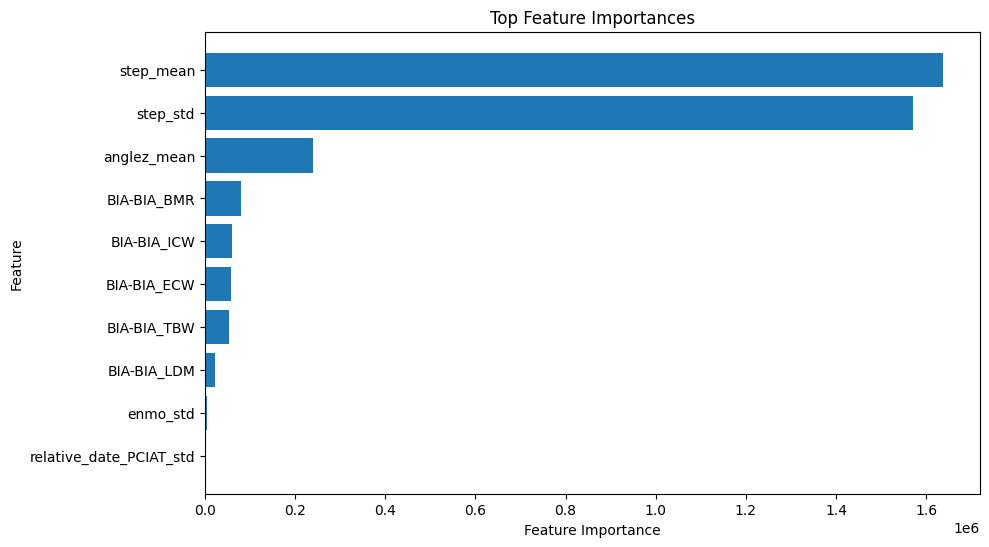

In [ ]:
# plot top 10 feature importances
feature_importances = np.abs(model.coef_)

# Create a DataFrame for easier sorting
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select top features
top_features = feature_importance_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top Feature Importances")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# predict test set
y_pred = model.predict(X_test)

# convert PCIAT-PCIAT_Total to sii
def convert_to_sii(pciat):
  if pciat <= 30:
    return 0
  elif pciat <= 49:
    return 1
  elif pciat <= 79:
    return 2
  else:
    return 3

y_pred_sii = [convert_to_sii(pred) for pred in y_pred]
y_test_sii = [convert_to_sii(t) for t in y_test]

In [ ]:
# evaluations
kappa = cohen_kappa_score(y_pred_sii, y_test_sii, weights='quadratic')
print(f"Cohen's Kappa Score: {kappa}")

mae = mean_absolute_error(y_pred_sii, y_test_sii)
print(f"Mean Absolute Error: {mae}")

# not that helpful as the ouput is ordinal
accuracy = accuracy_score(y_pred_sii, y_test_sii)
print(f"Accuracy Score: {accuracy}")

Cohen's Kappa Score: 0.3774085301842105
Mean Absolute Error: 0.47714808043875684
Accuracy Score: 0.56672760511883


In [ ]:
# Random Forest model
rf_model = RandomForestRegressor()

# train model
rf_model.fit(X_train_rf, y_train_rf)

RandomForestRegressor()

In [ ]:
# predict test set
y_pred = rf_model.predict(X_test_rf)

y_pred_sii = [convert_to_sii(pred) for pred in y_pred]
y_test_sii = [convert_to_sii(t) for t in y_test]

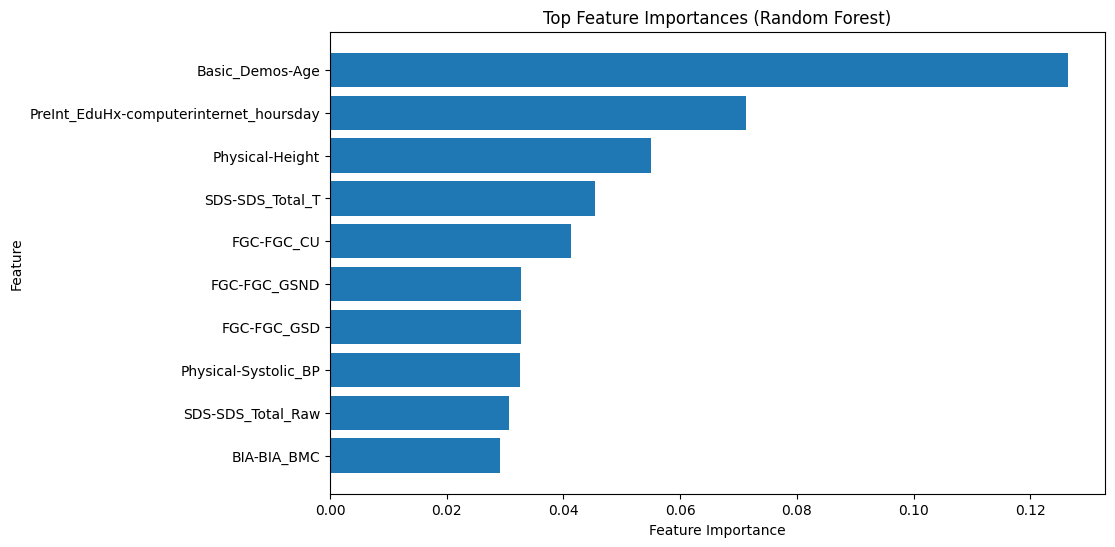

Cohen's Kappa Score: 0.37731014615826675
Mean Absolute Error: 0.45886654478976235
Accuracy Score: 0.5959780621572212


In [ ]:
# evaluations
# Feature importance for Random Forest
rf_feature_importances = rf_model.feature_importances_

rf_feature_importance_df = pd.DataFrame({'Feature': X_train_rf.columns, 'Importance': rf_feature_importances})
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)
top_rf_features = rf_feature_importance_df.head(10)

# top 10 features for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(top_rf_features['Feature'], top_rf_features['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

kappa = cohen_kappa_score(y_pred_sii, y_test_sii, weights='quadratic')
print(f"Cohen's Kappa Score: {kappa}")

mae = mean_absolute_error(y_pred_sii, y_test_sii)
print(f"Mean Absolute Error: {mae}")

# not that helpful as the ouput is ordinal
accuracy = accuracy_score(y_pred_sii, y_test_sii)
print(f"Accuracy Score: {accuracy}")